In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. the difference between the standard deviation (sd) and the standard deviation of the mean (sem) is that the sd is a calculation of the average variability between data points and the mean, and the sem  is the variability between the sample means and the true population mean. for example, given a data set you can calculate the mean and use an equation to determine the average amount data points strays from the mean, if you were to bootstrap the data set you would get a collection of means, in which you could use to determine an estimate of the true population mean, and then you could determine the sem which is the average amount the sample means stray from the true population mean.

2. to create a 95% confidence interval, you can use the standard error of the mean. after calculating the sem, the confidence interval would be roughly 2 times the sem from the sample mean. the interval can be written (confidence interval) = (sample mean) ± (2 x sem)

3. alternatively we can create 95% bootstrapped confidence interval by just taking an interval that covers 95% of the bootstrapped means. this means if you arrange the sample means in ascending order you can identify the 2.5th percentile and the 97.6th percentile and that interval is a 95% confidence interval.

4. 

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# Remove missing values from the 'body_mass_g' column
body_mass = df['body_mass_g'].dropna()

# Function to perform bootstrap resampling and calculate the confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, statistic=np.mean, ci_percentile=95):
    bootstrap_means = []
    
    # Bootstrap resampling
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_stat = statistic(bootstrap_sample)
        bootstrap_means.append(bootstrap_stat)
    
    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_means, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Calculate the 95% bootstrap confidence interval for the mean of body mass
body_mass_ci = bootstrap_confidence_interval(body_mass, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for Body Mass: {body_mass_ci}")


95% Bootstrap Confidence Interval for Body Mass: (4116.008771929824, 4285.604897660819)


this code can be modified to show the population median just by changing the statistic=np.mean to statistic=np.median, defining the median and changing the upper and lower bounds to np.percentile(bootstrap_medians, ...)

In [8]:
body_mass = df['body_mass_g'].dropna()

def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, statistic=np.median, ci_percentile=95):
    bootstrap_medians = []
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_stat = statistic(bootstrap_sample)
        bootstrap_medians.append(bootstrap_stat)
    
    lower_bound = np.percentile(bootstrap_medians, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrap_medians, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

body_mass_ci = bootstrap_confidence_interval(body_mass, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for Body Mass: {body_mass_ci}")


95% Bootstrap Confidence Interval for Body Mass: (3900.0, 4200.0)


5. population parameter and sample statistics are different in that the population parameter is the true value of a characteristic for the entire population, however a sample statistic is calculated to estimate the population parameter by bootstrapping. its important to differentiate them because in many cases we dont know the population parameter for certain, so we cannot say its characteristics, we can only estimate it.

6.1 bootstrapping is the process in which we have a sample of data, and we take the sample and create another set of data, of the same size and only using the data in the original sample, we do that by taking random elements in the sample (with replacement) to create the new set (so the new set will have some duplicates or some missing points compared to the original). and with the new set we can take the information like mean, median, etc... and then we do that many many times in order to have a large number of means, or medians such that we can create an estimate of characteristics of the entire population.

6.2 in many cases, we dont know the data of the entire population, so we cant give a definite characteristic like mean or median for the whole thing. bootstrapping allows us to estimate a populations characteristics by creating a bunch of sets (from one sample) that all reflect the population which is very helpful.

6.3 you would use bootstrapping to create a number of means and calculate the 95% confidence interval where the the population mean lies (which case most of the time it does) and then check if your hypothesis was correct (whether its in the confidence interval or not).

7. the confidence interval is where the population mean most often is found, if it were to overlap 0 then its possible that the population mean is 0, even if the sample mean itself is not 0, that just means more often then not its found closer to the sample mean, but close does not mean the population mean IS the sample mean. therefore you cannot rule out 0 as a possibility of the population mean if the confidence interval overlaps it. consequently, if the confidence interval does not overlap 0 you can rule it out as the population mean, since most of the time, the population mean is found within the interval.

8.

In [26]:
import pandas as pd
import numpy as np

# Create a DataFrame from the given data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84],
}

df = pd.DataFrame(data)
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [10]:
df.describe()

,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


INTRO:
- a null hypothesis of "no effect" in this context would be where there is no net change in health score after taking the vaccine

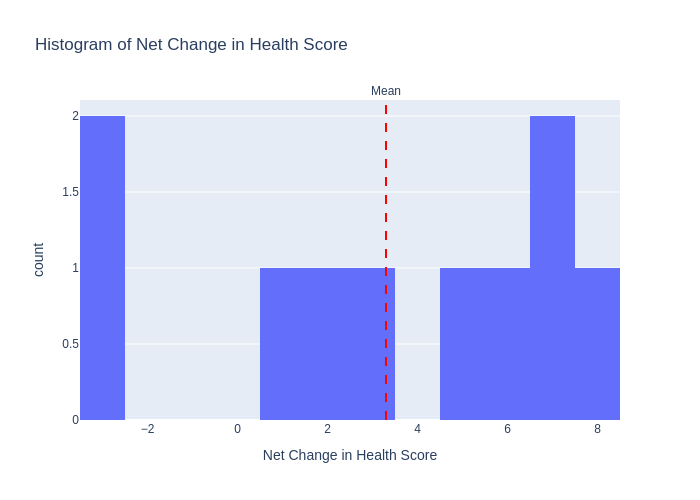

In [34]:
import plotly.express as px
df = pd.DataFrame(data)

df['NetChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Create a histogram of net change in health score
fig = px.histogram(df, x='NetChange', labels={'NetChange': 'Net Change in Health Score'}, title='Histogram of Net Change in Health Score', nbins=12)

mean_net_change = df['NetChange'].mean()
fig.add_vline(x=mean_net_change, line_width=2, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top")

# Show the figure
fig.show(renderer="png")

this is the histogram showing the net change in health score with a red line to represent the mean

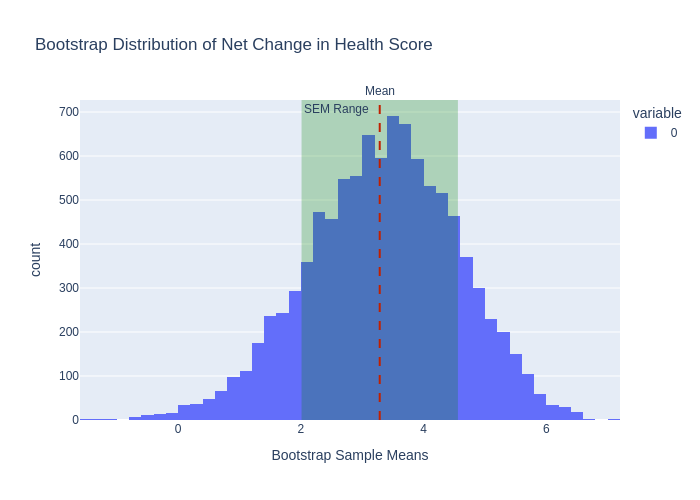

In [35]:
import plotly.graph_objects as go

# Number of bootstrap samples
n_bootstrap = 10000

# Function to perform bootstrap resampling
def bootstrap_means(data, n_samples):
    boot_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Perform bootstrapping
boot_means = bootstrap_means(df['NetChange'], n_bootstrap)

# Calculate the mean of the bootstrap sample means
mean_bootstrap = np.mean(boot_means)

# Calculate the standard error of the mean (SEM) based on the original sample
sem = df['NetChange'].std() / np.sqrt(len(df['NetChange']))

# Calculate the lower and upper bounds of the SEM range
sem_lower = mean_bootstrap - 1 * sem
sem_upper = mean_bootstrap + 1 * sem

# Create a histogram of the bootstrap sample means
fig = px.histogram(boot_means, nbins=50, labels={'value': 'Bootstrap Sample Means'}, title='Bootstrap Distribution of Net Change in Health Score')

# Add a vertical line for the average bootstrap mean
fig.add_vline(x=mean_bootstrap, line_width=2, line_dash="dash", line_color="red", annotation_text="Mean", annotation_position="top")

# Highlight the SEM interval with a shaded area
fig.add_vrect(x0=sem_lower, x1=sem_upper, fillcolor="green", opacity=0.25, line_width=0, annotation_text="SEM Range", annotation_position="top left")

# Show the figure
fig.show(renderer="png")

this figure shows the mean of the bootstrapped sample and also highlights the area containing the standard error of the mean

In [30]:
# Calculate the sample mean
sample_mean = df['NetChange'].mean()

# Calculate the standard error of the mean (SEM)
sem = df['NetChange'].std() / np.sqrt(len(df['NetChange']))

# Calculate the confidence interval using the formula: sample mean ± 2 * SEM
ci_lower_sem = sample_mean - 2 * sem
ci_upper_sem = sample_mean + 2 * sem

# Print the confidence interval
print(f"Confidence Interval (Sample Mean ± 2 * SEM): [{ci_lower_sem:.2f}, {ci_upper_sem:.2f}]")

Confidence Interval (Sample Mean ± 2 * SEM): [0.75, 5.85]


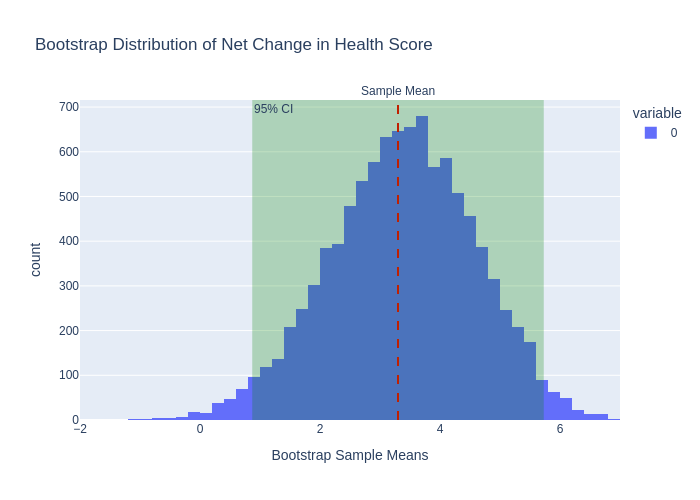

In [37]:
# Number of bootstrap samples
n_bootstrap = 10000

# Function to perform bootstrap resampling
def bootstrap_means(data, n_samples):
    boot_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Perform bootstrapping
boot_means = bootstrap_means(df['NetChange'], n_bootstrap)

# Calculate the sample mean from the original data
sample_mean = df['NetChange'].mean()

# Calculate the standard error of the mean (SEM) based on the bootstrap sample means
sem_bootstrap = np.std(boot_means)

# Calculate the confidence interval using the original sample mean and SEM (Sample Mean ± 2 * SEM)
ci_lower = sample_mean - 2 * sem_bootstrap
ci_upper = sample_mean + 2 * sem_bootstrap

# Create a histogram of the bootstrap sample means
fig = px.histogram(boot_means, nbins=50, labels={'value': 'Bootstrap Sample Means'}, title='Bootstrap Distribution of Net Change in Health Score')

# Add a vertical line for the original sample mean
fig.add_vline(x=sample_mean, line_width=2, line_dash="dash", line_color="red", annotation_text="Sample Mean", annotation_position="top")

# Highlight the confidence interval based on the original sample mean with a shaded area
fig.add_vrect(x0=ci_lower, x1=ci_upper, fillcolor="green", opacity=0.25, line_width=0, annotation_text="95% CI", annotation_position="top left")

# Show the figure
fig.show(renderer="png")

Conclusion:
this figure shows the confidence interval on a bootstrapped data set, as been seen the 0 lies outside of the confidence interval, this means that it is safe to assume that vaccine has a net positive effect on the patient.

9. somewhat (only chatgpt)

chat bot summaries:
https://chatgpt.com/share/66fb7d42-ae18-8008-96e1-5212f1b1da45
Summary
In this exercise, we explored how to create confidence intervals using bootstrapping and visualized the results with histograms.

1. Bootstrap Confidence Interval (CI):

We performed bootstrapping on a dataset that included net changes in health scores. By resampling the data 10,000 times, we computed the means of the bootstrapped samples.
To calculate the 95% confidence interval, we used the 2.5th and 97.5th percentiles of the bootstrapped means and highlighted this interval on a histogram of the bootstrapped sample means.

2. SEM-Based Confidence Interval:

We also computed a confidence interval using the original sample mean and the standard error of the mean (SEM) derived from the bootstrapped sample means. The formula used was 
Sample Mean±2×SEM.
This interval was then highlighted on a histogram of the bootstrap distribution, with a vertical line representing the original sample mean.

3. Comparing CIs:

We discussed the difference between a confidence interval derived from bootstrapped means (percentile method) and one calculated using the SEM, emphasizing that the former relies on empirical resampling while the latter is based on theoretical assumptions of the standard error.
In both cases, visualizations were created using Plotly to clearly represent the intervals and the distribution of bootstrapped sample means, offering insights into the plausible range of the population parameter based on the sample data.

This summary encapsulates the work done on bootstrapping, calculating confidence intervals, and visualizing results through histograms.